In [1]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100,size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3],x[7],x[2]]

[71, 86, 14]

In [3]:
ind = [3,7,2]
x[ind]

array([71, 86, 14])

In [4]:
ind = np.array([[3,7],
            [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [7]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

### Combined Indexing

In [8]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [9]:
X[2,[2,0,1]]

array([10,  8,  9])

In [10]:
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [11]:
mask = np.array([1,0,1,0], dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### Example : Selecting Random Points

In [12]:
mean = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean, cov,100)
X.shape

(100, 2)

#### *I need to read more on multivariate normal distribution and covariance*

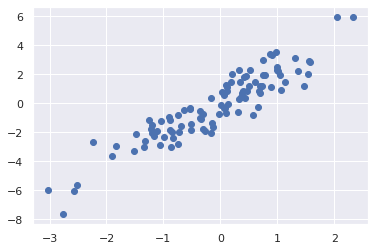

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:,0], X[:,1]);

In [14]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([40, 71, 73, 74, 72, 36,  4, 33, 52, 48, 83, 62, 20,  8, 49, 84, 18,
       11, 28, 19])

In [15]:
selection = X[indices]
selection.shape

(20, 2)

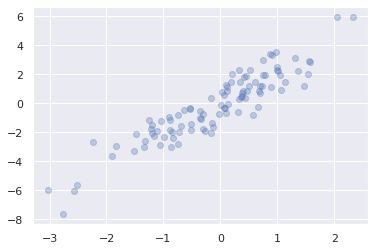

In [16]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],facecolor='none', s=200);

#### Modifying Values with Fancy Indexing

In [17]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [18]:
x[i]-=10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [19]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [21]:
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


#### Example : Binning Data

In [22]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of the bins
np.add.at(counts, i, 1)

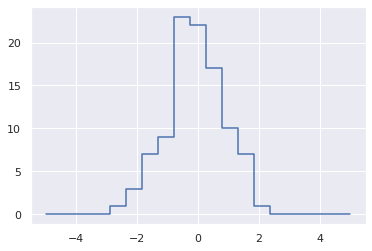

In [23]:
# plot the results
plt.plot(bins, counts,drawstyle ='steps')

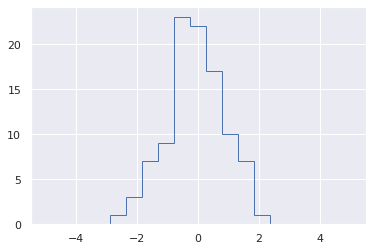

In [24]:
plt.hist(x, bins, histtype='step');

In [25]:
print("Numpy routine:")
%timeit counts, edges = np.histogram(x,bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy routine:
32.1 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
16.1 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
x = np.random.randn(1000000)
print("Numpy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

Numpy routine:
73 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
